<a href="https://colab.research.google.com/github/GyanendraChaubey/Explainable-AI-Explaining-Black-box-of-Machine-Learning-Models-in-Thyroid-Disease-Prediction/blob/main/XAI_ThyroidDiseasePrediction_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing SHAP Explainar


In [45]:
!pip install shap

     |████████████████████████████████| 358kB 25.2MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491626 sha256=8b12bd1445a46d83a6385e15a52aabda79a89e569a982b3709659eb664ef73ee
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [47]:
import shap

Importing Necessary Libraries 

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

Loading Data

In [3]:
data=pd.read_csv('/content/drive/MyDrive/T3resin1.txt')

Making copy data

In [10]:
data=data.copy()

Understanding Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Class                                    215 non-null    int64  
 1   T3-resin uptake test                     215 non-null    int64  
 2   Total Serum thyroxin                     215 non-null    float64
 3   Total serum triiodothyronine             215 non-null    float64
 4   basal thyroid-stimulating hormone (TSH)  215 non-null    float64
 5   Maximal absolute difference of TSH       215 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 10.2 KB


In [5]:
data.shape

(215, 6)

In [7]:
data.size

1290

In [8]:
data.describe()

,Class,T3-resin uptake test,Total Serum thyroxin,Total serum triiodothyronine,basal thyroid-stimulating hormone (TSH),Maximal absolute difference of TSH
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.693023,109.595349,9.804651,2.050233,2.880000,4.199070
std,0.462316,13.145447,4.697362,1.419486,6.118031,8.070519
min,0.000000,65.000000,0.500000,0.200000,0.100000,-0.700000
25%,0.000000,103.000000,7.100000,1.350000,1.000000,0.550000
50%,1.000000,110.000000,9.200000,1.700000,1.300000,2.000000
75%,1.000000,117.500000,11.300000,2.200000,1.700000,4.100000
max,1.000000,144.000000,25.300000,10.000000,56.400000,56.300000


In [9]:
data.isnull().sum()

Class                                      0
T3-resin uptake test                       0
Total Serum thyroxin                       0
Total serum triiodothyronine               0
basal thyroid-stimulating hormone (TSH)    0
Maximal absolute difference of TSH         0
dtype: int64

In [11]:
data.head()

,Class,T3-resin uptake test,Total Serum thyroxin,Total serum triiodothyronine,basal thyroid-stimulating hormone (TSH),Maximal absolute difference of TSH
0,1,107,10.1,2.2,0.9,2.7
1,1,113,9.9,3.1,2.0,5.9
2,1,127,12.9,2.4,1.4,0.6
3,1,109,5.3,1.6,1.4,1.5
4,1,105,7.3,1.5,1.5,-0.1


Exploratory data Analysis

In [12]:
data.columns

Index(['Class', 'T3-resin uptake test', 'Total Serum thyroxin',
       'Total serum triiodothyronine',
       'basal thyroid-stimulating hormone (TSH)',
       'Maximal absolute difference of TSH'],
      dtype='object')

In [13]:
data.drop_duplicates(keep='first',inplace=True)

In [14]:
data.shape

(215, 6)

In [15]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


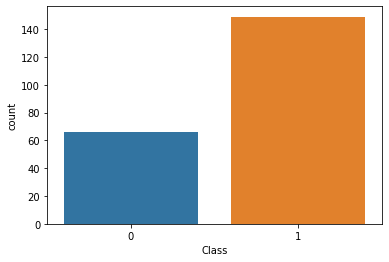

In [16]:
sns.countplot(data['Class'])

In [18]:
data.corr()

,Class,T3-resin uptake test,Total Serum thyroxin,Total serum triiodothyronine,basal thyroid-stimulating hormone (TSH),Maximal absolute difference of TSH
Class,1.000000,0.111716,-0.190631,-0.334558,-0.384972,-0.312427
T3-resin uptake test,0.111716,1.000000,-0.494162,-0.536971,0.290368,0.296327
Total Serum thyroxin,-0.190631,-0.494162,1.000000,0.718682,-0.422845,-0.409965
Total serum triiodothyronine,-0.334558,-0.536971,0.718682,1.000000,-0.241641,-0.227392
basal thyroid-stimulating hormone (TSH),-0.384972,0.290368,-0.422845,-0.241641,1.000000,0.497545
Maximal absolute difference of TSH,-0.312427,0.296327,-0.409965,-0.227392,0.497545,1.000000


Separating features and target variable 

In [24]:
y=data['Class']
x=data.drop(columns='Class')

Splitting the data into train and test

In [21]:
from sklearn.model_selection import train_test_split 

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

Creating Object of model

In [26]:
model=LogisticRegression()

Fitting the model

In [27]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting the model on test data

In [28]:
y_pred=model.predict(x_test)

Calculating the accuracy

In [29]:
#importing performance matrics accuracy_score & confusion_matrix
from sklearn.metrics import accuracy_score

In [31]:
accuracy=accuracy_score(y_test,y_pred)

In [42]:
print('Accuracy: %.2f%%' % (accuracy*100))

Accuracy: 87.69%


Calculating the misclassification

In [43]:
print('Misclassification: %.2f%%' % ((y_test!=y_pred).sum()))

Misclassification: 8.00%


XAI: SHAP to explain the *model*

---

SHAP: Shapely Additive Explanations

---


Generate Linear Explainer and SHAP values

In [56]:
explainer=shap.LinearExplainer(model,x)
shap_values = explainer.shap_values(x)
expected_value = explainer.expected_value

---

*********Visualisations*********

---

Summarize the effect of all features

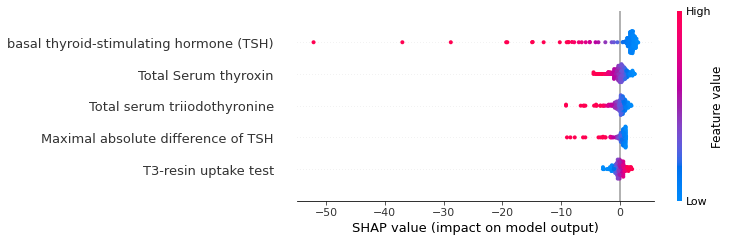

In [57]:
shap.summary_plot(shap_values, x,title="SHAP summary plot") 

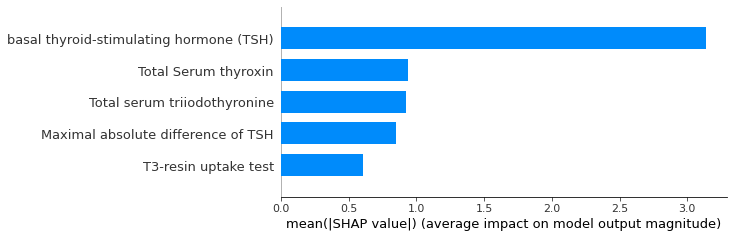

In [59]:
# Generate summary bar plot 
shap.summary_plot(shap_values, x,plot_type="bar") 

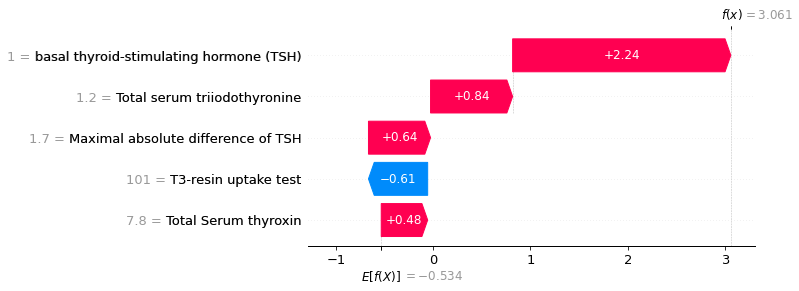

In [66]:
# Generate waterfall plot  
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[20], features=x.loc[20,:], feature_names=x.columns, max_display=5, show=True)

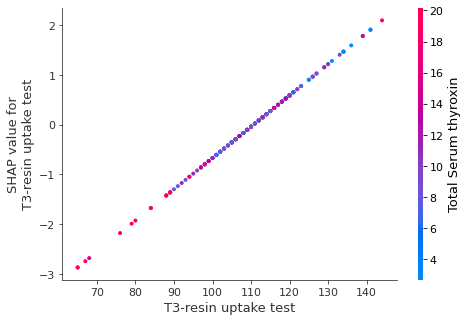

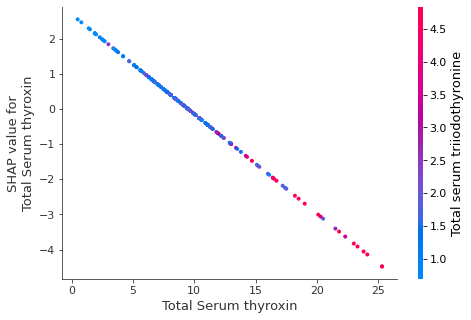

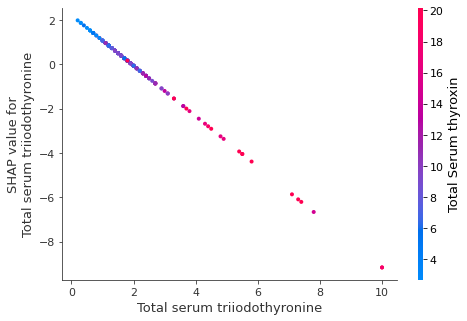

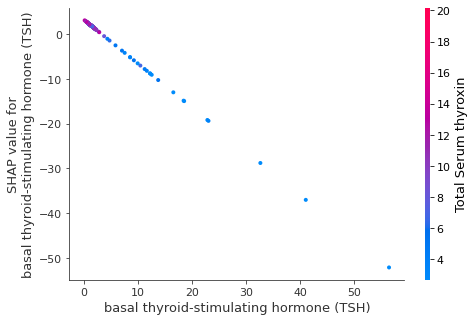

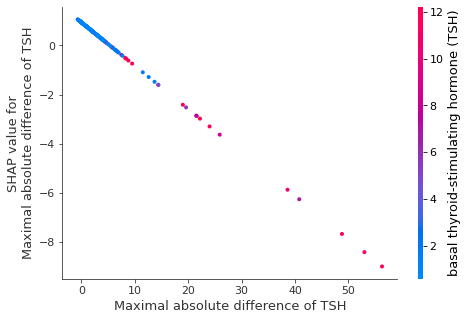

In [80]:
# Generate multiple dependence plots
for name in x_train.columns:
     shap.dependence_plot(name, shap_values, x)


In [86]:
# Generate force plot - Multiple rows
shap.initjs() 
shap.force_plot(explainer.expected_value, shap_values[:50,:], x.iloc[:50,:])

In [89]:
# Generate force plot - Single
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], x.iloc[0,:])

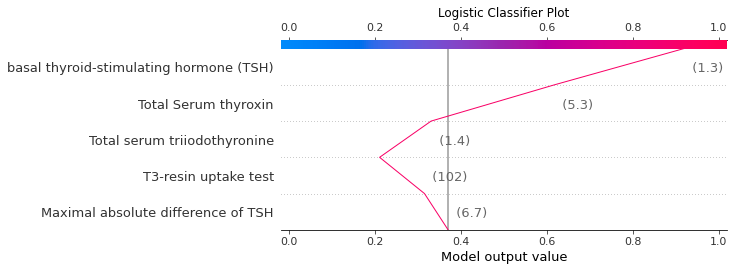

In [92]:
# Generate Decision plot 
shap.decision_plot(expected_value, shap_values[214],link='logit' ,features=x.loc[214,:], feature_names=(x.columns.tolist()),show=True,title="Logistic Classifier Plot")